In [140]:
# setup
from IPython.display import display,HTML
display(HTML('<style>.prompt{width: 0px; min-width: 0px; visibility: collapse}</style>'))
display(HTML(open('../rise.css').read()))

# imports
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
import time
import functools
%matplotlib inline
sns.set(style="whitegrid", font_scale=1.5, rc={'figure.figsize':(12, 6)})


<style>.jp-RenderedHTMLCommon table {
  border-collapse: collapse;
  border-spacing: 0;
  border: none;
  color: var(--jp-ui-font-color1);
  font-size: 20px;
  table-layout: fixed;
  margin-left: auto;
  margin-right: auto;
}</style>

# CMPS 2200
# Introduction to Algorithms

## Dynamic Programming


Agenda:

- "Dynamic Programming" Paradigm

Dynamic programming is the technique of remembering previous calculations to avoid recalculating.

<h3>Example: Fibbonaci Numbers</h3> 

Problem: Calculate the $n^{th}$ Fibonacci number using the recurrence $F(n)=F(n-1)+F(n-2)$ and the base cases $F(0)=F(1)=1$.

The naive calculation has the following recursive equation for its work:

$W(n)=W(n-1)+W(n-2) \geq 2W(n-2)$.

This recurrence solves to $W(n)\geq 2^{\frac{n}{2}}$, which increases exponentially. But there is wasted work, because in calculating $F(n-1)$, we use the recurrence $F(n-2)+F(n-3)$. So we are calculating $F(n-2)$ twice!

Dynamic programming is the technique of remembering which calculations were performed to avoid duplicating efforts. Using dynamic programming, we will only cacluate $F(k)$ once for each $k<n$. So our recurrence equation become $W(n)=W(n-1)+\Theta(1)$, since, in calculating $F(n-1)$ we will have also calculated $F(n-2)$, and it only takes $\Theta(1)$ work to retrieve the stored outcome of that calculation. Therefore $W(n)\in \Theta(n)$ when dynamic programming is used. This is an exponential speedup.

<h3>Two methods of dynamic programming: going up or going down </h3>

Dynamic programming can be done in two ways.

- Going down: When calculating $F(n)$, we go to calculate $F(n-1)$ and $F(n-2)$. Then we recurse and calculate $F(n-1)$. Each time we encounter a subproblem that has been solved, we just use the remembered solution.

- Going up: We can calculate $F(n)$ by first calculating $F(1)$, then $F(2)$, and so forth until we reach $F(n)$. When calculating $F(k)$, we can use the fact that $F(k^\prime)$ has already been calculated for $k^\prime <k$.

Sometimes, "going down" is called "memoization" and the term "dynamic programming" is reserved for "going up."

<h3>Another Example: Taking powers by repeated squaring.</h3>

We have seen (see Recitation 2) that to calculate $a^b$ we can use repeated squaring. If $b$ is even, we calculate $a^b=(a^{\frac{b}{2}})(a^{\frac{b}{2}})$ and if $b$ is odd, we calculate $a^b=a(a^{\frac{b-
1}{2}})(a^{\frac{b-1}{2}})$.

The work is $W(a,b)= 2W(a,\frac{b}{2})+\Theta(1)$, which solves to $W(a,b)=\Theta(b)$. Using dynamic programming, the recurrence becomes $W(a,b)=W(a,\frac{b}{2})+O(1)$, which solves to $W(a,b)=\Theta(\log(b))$. Again, we get an expotential speedup.

For this algorithm, you can also avoid dynamic programming by calculating $a^b=(a^2)^{\frac{b}{2}}$ when $b$ is even and $a^b=a(a^2)^{\frac{b-1}{2}}$ when $b$ is odd.

<h3>Dijkstra's Algorithm</h3>

We just saw a third example of dynamic programming: Dijkstra's algorithm.

Recall that Dijkstra's algorithm calculates the shortest path from a source vertex $s$ to all other vertices in an edge-weighted graph $G$, assuming the edge-weights are nonnegative. The algorithm operates by maintaining a set $X$ of vertices for which the shortest path from $s$ has already been calculated. It iteratively adds the closest vertex to $X$.

The usual formulation of Dijkstra's algorithm uses the going-up version of dynamic programming. We start with the source vertex $\delta_G(s,s)=0$ and continually add the nearest vertex in the frontier to $X$, noting the length of the shortest path from $s$. When adding the next vertex to $X$, we rely on these previous stored calculations, which is the essence of dynamic programming.

<h3>Finding the shortest path</h3>

When dynamic programming is applied to optimization problems, as in Dijkstra's algorithm, it usually gives more than the optimal value. We can modify it to provide the solution that attains that optimal value. In the case of Dijkstra's algorithm, we can remember not just the length of the shortest path from $s$, but what that path actually is.

<h3>Return of Knuth-Morris-Pratt</h3>

We have already seen yet another application of dynamic programming: the Knuth-Morris-Pratt string matching algorithm.

Recall that the algorithm takes two strings $gene$ (of length $m$) and $genome$ (of length $n$). It determines whether $gene$ is a substring of $genome$ in worst-case linear time by using a table to shift the gene whenever a mismatch is found.

We did not discuss constructing the table that determines how much to shift $gene$ whenever a mismatch is found. Instead, we implemented a naive $O(m^3)$ algorithm to do this. Here, we will explain how to use dynamic programming to calculate this table in $O(m)$ time.

First, recall the straightforward implementation that was included in Recitation 0. When there is a mismatch at position $j$, the function finds the smallest shift $s$ such that $gene[j] \neq gene[j-s]$ but the other letters match: $gene[:j-1]==gene[s:j]$. The straightforward implementation expresses this directly using list comprehensions.

In [141]:

def compute_table(gene):
    '''Expect that gene is a string of length m.
    returns a list of indices. The jth index in the list indicates how many places to move the pattern if a mismatch occurs at position j.
    This is not the most efficient way to do this. This is an O(m^3) algorithm, where m is the length of gene.
    I've written it this way because this is the most direct way to describe how the table is defined.
    A better implementation can run in linear time, O(m).
    '''
    table = []
    for j,g in enumerate(gene):
        shift_when_mismatch_at_j = min([s for s in range(j+1) if gene[:j-s]==gene[s:j] and gene[j]!= gene[j-s]], default = j+1)
        table.append(shift_when_mismatch_at_j)
    return table

def test_compute_table():
    gene = "abcabcacab"
    print(compute_table(gene))
    ideal_answer=  [ j - i +1 for j,i in enumerate([0,1,1,0,1,1,0,5,0,1])] #See Knuth's paper, keep in mind he starts indexing at 1 instead of 0.
    assert compute_table(gene)== ideal_answer
test_compute_table()
print(compute_table("abcabcacab"))


[1, 1, 2, 4, 4, 5, 7, 3, 9, 9]
[1, 1, 2, 4, 4, 5, 7, 3, 9, 9]


Now let's implement the same function using dynamic programming. First, we remove the condition that $gene[j] \neq gene[s-j]$. A shift $s$ such that $gene[:j-s]==gene[s:j]$ will also satisfy the less stringent condition that $gene[:(j-1)-s]==gene[s:j-1]$. We can use dynamic programming to find this shift based on the computation for the mismatch at position $j-1$.

In [142]:

def compute_table_relaxed(gene):
    #Like compute_table, but without the condition that gene[j]!=gene[j-s]
        shifts = []
        for j in range(len(gene)):
            if j==0: #The first shift is always 1.
                shifts.append(1)
            else:
                shift = shifts[j-1] #find the shift for a mismatch at the previous position. This is dynamic programming!
                while j-1-shift>=0 and gene[j-1-shift]!=gene[j-1]: #While there's a mismatch at position j-1,
                    shift += shifts[j-1-shift] #shift again.
                shifts.append(shift)
        return shifts

def compute_table_dynamic_programming(gene):
    #Should have the same behavior as compute_table but will run faster.
    relaxed_shifts = compute_table_relaxed(gene)
    table = []
    for j in range(len(gene)):
        shift = relaxed_shifts[j]
        while shift<=j and gene[j]==gene[j-shift]: #Continually shift until gene[j]!=gene[j-shift]
            shift += relaxed_shifts[j-shift]
        table.append(shift)
    return table

def test_compute_table_dynamic_programming():   
    gene = "abcabcacab"
    assert compute_table_dynamic_programming(gene)==compute_table(gene)
test_compute_table_dynamic_programming()

<h3>Runtime of Knuth-Morris-Pratt</h3>

The dynamic programming method to compute the shift table runs in $O(2m)=O(m)$ time for the same reason that the Knuth-Morris-Pratt algorithm runs in $O(n)$ times. At each step, we either increment $j$ or shift the gene over itself. This argument is a bit tricky, so we check it by timing the functions and plotting their runtimes.

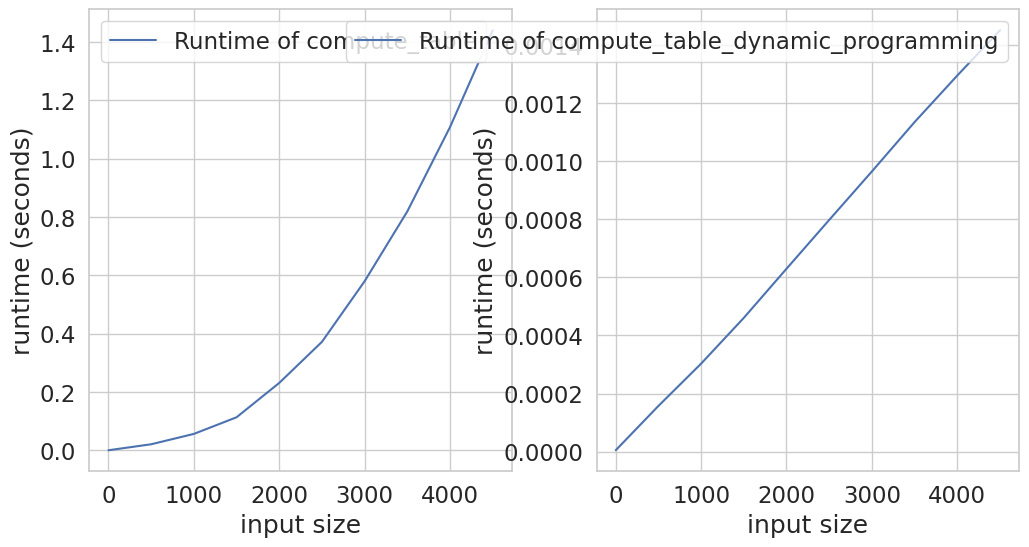

In [143]:
def time_function(f,arg): #Assumes f is a function with 1 argument.
    start_time = time.time()
    f(arg)
    end_time = time.time()
    return end_time-start_time
def time_functions(time_function,func1, func2,args_list,x_params):
    #This function has tons of arguments because I want to reuse it again later.
    outputs_func1 = [time_function(func1, input) for input in args_list]
    outputs_func2 = [time_function(func2, input) for input in args_list]
    plt.subplot(1,2,1)
    plt.plot(x_params, outputs_func1, label=f'Runtime of {func1.__name__}')

    plt.xlabel("input size")
    plt.ylabel('runtime (seconds)')
    plt.legend()

    plt.subplot(1,2,2)
    plt.plot(x_params, outputs_func2, label=f'Runtime of {func2.__name__}')

    plt.xlabel("input size")
    plt.ylabel('runtime (seconds)')
    plt.legend()
    plt.show()
letters = ['a', 't', 'g', 'c']
gene = ''.join(random.choices(letters, k=5000))
inputs = range(1,5001,500)
args_list = [gene[:input] for input in inputs]
time_functions(time_function,compute_table,compute_table_dynamic_programming,args_list,inputs)

### 0-1 Knapsack

Another standard application of dynamic programming is the $0-1$ knapsack problem, which we now describe.

Suppose there are $n$ objects, each with a *value* $v_i$ and *weight* $w_i$. You have a "knapsack" of capacity $W$ and want to fill it with a set of objects $X \subseteq [n]$ so that $w(X) \leq W$ and $v(X)$ is maximized. 

We can give a simple counterexample with 2 objects that have values/weights $(10, 5), (9, 3)$ with $W=5$ that shows that the optimal solution is not necessarily achieved by choosing the items with the largest value/weight ratio.

|index |value|weight|
|------|------|-----|
|0     | 10    |5    |
|1     | 9     |3    |
    
Item $1$ has the largest value/weight ratio, but when we put it in the knapsack, we are stuck with a value of $9$. The optimal solution is clearly to take item $0$ to attain a value of $10$. The problem is that the greedy choice to maximize value/weight is incorrect because we can have leftover capacity. We really need to look at *all possible* choices of objects and their associated optimal solutions. 


### Exploring Multiple Solutions

|index |value|weight|
|------|------|-----|
|0     | 10    |5    |
|1     | 9     |3    |

Let $OPT(n, W)$ be an optimal solution to the Knapsack problem for a set of objects $S$ where we are choosing whether to take the object at index $n$ and we have a current capacity of $W$.



<br>

Now, we can make the following simple observation: 

If object $n$ is in the optimal solution, then 

$OPT(n, W)= \{n\} \cup OPT(n-1, W-w(n)).$ 

else $n$ is not in the optimal solution and

$OPT(n, W) = OPT(n-1, W)$.

## Optimal Substructure for Knapsack 

For any set $S$ of $n$ objects and $W>0$, we have

$\begin{align}
v(OPT(n, W)) = \max \{&v(n) + v(OPT(n-1, W - w(n))), \\
&v(OPT(n-1, W))\}
\end{align}$

with respect to choosing some object $n$.



In a way, this really isn't saying much. Put plainly we're just saying that the optimal solution either contains object $n$ or it doesn't.



Note that our optimal substructure recurrence depends both on the number of objects as well as their weights. 


From our example:

|index |value|weight|
|------|------|-----|
|0     | 10    |5    |
|1     | 9     |3    |

For choosing object $1$, we have that:

$\begin{align}
v(OPT(1, 5)) &=\max\{v(1) + v(OPT(0, 2)), v(OPT(0, 5))\} \\
&=\max\{9, 10\} \\
&=10. \\
\end{align}$



Does this give us an algorithm?



$$\begin{array}{ll}
\mathit{knapsack~~n~~W} = \\
~~~~~\mathtt{if}~~~n = 0\\
~~~~~~~~~~0 \\
~~~~~\mathtt{if}~~~n = 1 \\
~~~~~~~~~~\mathtt{if}~~~w(1) \leq W\\
~~~~~~~~~~~~~~~v(1) \\
~~~~~~~~~~\mathtt{else}~~~0 \\
~~~~~\mathtt{else} \\
~~~~~~~~~~\mathtt{if}~~~w(n) \geq W\\
~~~~~~~~~~~~~~~~~~~~\mathit{knapsack ~~n-1 ~~ W}\\
~~~~~~~~~~\mathtt{else}\\
~~~~~~~~~~~~~~~~~~~~\max\{\mathit{v(i)+knapsack~~n-1~~W-w(n)},~~\mathit{knapsack~~n-1~~W}\} \\
\end{array}$$



### The recurrence

$\begin{align}
v(OPT(n, W)) = \max \{&v(n) + v(OPT(n-1, W - w(n))), \\
&v(OPT(n-1, W))\}
\end{align}$

The number of recursive calls doubles in every recursion. But suppose all items have weight 1. Is there a glaring inefficiency we can fix? Let's consider the recursion tree:

<img src="figures/knapsack_recursion_tree.jpg" width="70%">



If we blindly recompute the redundant calls when they are encountered, then we will do $\Omega(2^n)$ work and $O(n)$ span even if we can take all the items.  



However, suppose that whenever we need to compute $v(OPT(i, w))$, we compute it once and save the result for later use (e.g., in a suitable data structure) -- this is called *memoization*. Then, we no longer have a binary tree but rather a **directed acyclic graph** or **DAG**.


<img src="figures/knapsack_recursion_dag.jpg" width="70%">



The number of nodes in this DAG will allow us to determine the work of this algorithm, and the longest path in the DAG will allow us to determine the span. 


## Going-up Dynamic Programming Example

Suppose we have the following items for the 0-1 knapsack problem.

|index |value|weight|
|------|------|-----|
| 0    | 10   | 5   |
| 1    | 6    | 3   |
| 2    | 7    | 2   |

We can use our recurrence to build and fill in a table.

$\begin{align}
v(OPT(n, W)) = \max \{&v(n) + v(OPT(n-1, W - w(n))), \\
&v(OPT(n-1, W))\}
\end{align}$

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  overflow:hidden;padding:4px 10px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  font-weight:normal;overflow:hidden;padding:4px 10px;word-break:normal;}
.tg .tg-t6ha{border-color:#000000;font-size:20px;font-weight:bold;text-align:left;vertical-align:top}
.tg .tg-on5d{border-color:#ffffff;font-size:20px;text-align:center;vertical-align:middle}
.tg .tg-b8y7{border-color:#ffffff;font-size:20px;text-align:center;vertical-align:top}
.tg .tg-418g{border-color:#000000;font-size:20px;font-weight:bold;text-align:center;vertical-align:top}
.tg .tg-l4pv{border-color:#000000;font-size:20px;text-align:left;vertical-align:top}
.tg .tg-4n8x{border-color:#000000;font-size:20px;text-align:center;vertical-align:top}
</style>
<table class="tg">
<thead>
  <tr>
    <th class="tg-b8y7"></th>
    <th class="tg-b8y7" colspan="7">W<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td class="tg-on5d" rowspan="4">n<br></td>
    <td class="tg-l4pv"></td>
    <td class="tg-418g">0</td>
    <td class="tg-418g">1</td>
    <td class="tg-418g">2</td>
    <td class="tg-418g">3</td>
    <td class="tg-418g">4</td>
    <td class="tg-418g">5</td>
  </tr>
  <tr>
    <td class="tg-t6ha">0</td>
    <td class="tg-4n8x"></td>
    <td class="tg-4n8x"></td>
    <td class="tg-4n8x"></td>
    <td class="tg-4n8x"></td>
    <td class="tg-4n8x"></td>
    <td class="tg-4n8x"></td>
  </tr>
  <tr>
    <td class="tg-t6ha">1</td>
    <td class="tg-4n8x"></td>
    <td class="tg-4n8x"></td>
    <td class="tg-4n8x"></td>
    <td class="tg-4n8x"></td>
    <td class="tg-4n8x"></td>
    <td class="tg-4n8x"></td>
  </tr>
  <tr>
    <td class="tg-t6ha">2</td>
    <td class="tg-4n8x"></td>
    <td class="tg-4n8x"></td>
    <td class="tg-4n8x"></td>
    <td class="tg-4n8x"></td>
    <td class="tg-4n8x"></td>
    <td class="tg-4n8x"></td>
  </tr>
</tbody>
</table>

First we fill in item $0$ by simply considering it. For each capacity, can it fit in a bag of that capacity?


<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  overflow:hidden;padding:4px 10px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  font-weight:normal;overflow:hidden;padding:4px 10px;word-break:normal;}
.tg .tg-t6ha{border-color:#000000;font-size:20px;font-weight:bold;text-align:left;vertical-align:top}
.tg .tg-on5d{border-color:#ffffff;font-size:20px;text-align:center;vertical-align:middle}
.tg .tg-b8y7{border-color:#ffffff;font-size:20px;text-align:center;vertical-align:top}
.tg .tg-418g{border-color:#000000;font-size:20px;font-weight:bold;text-align:center;vertical-align:top}
.tg .tg-l4pv{border-color:#000000;font-size:20px;text-align:left;vertical-align:top}
.tg .tg-4n8x{border-color:#000000;font-size:20px;text-align:center;vertical-align:top}
</style>
<table class="tg">
<thead>
  <tr>
    <th class="tg-b8y7"></th>
    <th class="tg-b8y7" colspan="7">W<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td class="tg-on5d" rowspan="4">n<br></td>
    <td class="tg-l4pv"></td>
    <td class="tg-418g">0</td>
    <td class="tg-418g">1</td>
    <td class="tg-418g">2</td>
    <td class="tg-418g">3</td>
    <td class="tg-418g">4</td>
    <td class="tg-418g">5</td>
  </tr>
  <tr>
    <td class="tg-t6ha">0</td>
    <td class="tg-4n8x">0</td>
    <td class="tg-4n8x">0</td>
    <td class="tg-4n8x">0</td>
    <td class="tg-4n8x">0</td>
    <td class="tg-4n8x">0</td>
    <td class="tg-4n8x">10<br></td>
  </tr>
  <tr>
    <td class="tg-t6ha">1</td>
    <td class="tg-4n8x"></td>
    <td class="tg-4n8x"></td>
    <td class="tg-4n8x"></td>
    <td class="tg-4n8x"></td>
    <td class="tg-4n8x"></td>
    <td class="tg-4n8x"></td>
  </tr>
  <tr>
    <td class="tg-t6ha">2</td>
    <td class="tg-4n8x"></td>
    <td class="tg-4n8x"></td>
    <td class="tg-4n8x"></td>
    <td class="tg-4n8x"></td>
    <td class="tg-4n8x"></td>
    <td class="tg-4n8x"></td>
  </tr>
</tbody>
</table>

Then we use the recurrence together with previously calculated values to complete the subsequent rows.

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  overflow:hidden;padding:4px 10px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  font-weight:normal;overflow:hidden;padding:4px 10px;word-break:normal;}
.tg .tg-t6ha{border-color:#000000;font-size:20px;font-weight:bold;text-align:left;vertical-align:top}
.tg .tg-on5d{border-color:#ffffff;font-size:20px;text-align:center;vertical-align:middle}
.tg .tg-b8y7{border-color:#ffffff;font-size:20px;text-align:center;vertical-align:top}
.tg .tg-418g{border-color:#000000;font-size:20px;font-weight:bold;text-align:center;vertical-align:top}
.tg .tg-l4pv{border-color:#000000;font-size:20px;text-align:left;vertical-align:top}
.tg .tg-4n8x{border-color:#000000;font-size:20px;text-align:center;vertical-align:top}
</style>
<table class="tg">
<thead>
  <tr>
    <th class="tg-b8y7"></th>
    <th class="tg-b8y7" colspan="7">W<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td class="tg-on5d" rowspan="4">n<br></td>
    <td class="tg-l4pv"></td>
    <td class="tg-418g">0</td>
    <td class="tg-418g">1</td>
    <td class="tg-418g">2</td>
    <td class="tg-418g">3</td>
    <td class="tg-418g">4</td>
    <td class="tg-418g">5</td>
  </tr>
  <tr>
    <td class="tg-t6ha">0</td>
    <td class="tg-418g">0</td>
    <td class="tg-4n8x">0</td>
    <td class="tg-4n8x">0</td>
    <td class="tg-418g">0</td>
    <td class="tg-4n8x">0</td>
    <td class="tg-4n8x">10<br></td>
  </tr>
  <tr>
    <td class="tg-t6ha">1</td>
    <td class="tg-4n8x">0</td>
    <td class="tg-4n8x">0</td>
    <td class="tg-4n8x">0</td>
    <td class="tg-418g">6</td>
    <td class="tg-4n8x"></td>
    <td class="tg-4n8x"></td>
  </tr>
  <tr>
    <td class="tg-t6ha">2</td>
    <td class="tg-4n8x"></td>
    <td class="tg-4n8x"></td>
    <td class="tg-4n8x"></td>
    <td class="tg-4n8x"></td>
    <td class="tg-4n8x"></td>
    <td class="tg-4n8x"></td>
  </tr>
</tbody>
</table>

$\begin{align}
v(OPT(1, 3)) &= \max \{6 + v(OPT(0, 3-3)),v(OPT(0, 3)) \}\\
&=\max\{6+0, 0\}=6
\end{align}$

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  overflow:hidden;padding:4px 10px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  font-weight:normal;overflow:hidden;padding:4px 10px;word-break:normal;}
.tg .tg-t6ha{border-color:#000000;font-size:20px;font-weight:bold;text-align:left;vertical-align:top}
.tg .tg-on5d{border-color:#ffffff;font-size:20px;text-align:center;vertical-align:middle}
.tg .tg-b8y7{border-color:#ffffff;font-size:20px;text-align:center;vertical-align:top}
.tg .tg-418g{border-color:#000000;font-size:20px;font-weight:bold;text-align:center;vertical-align:top}
.tg .tg-l4pv{border-color:#000000;font-size:20px;text-align:left;vertical-align:top}
.tg .tg-4n8x{border-color:#000000;font-size:20px;text-align:center;vertical-align:top}
</style>
<table class="tg">
<thead>
  <tr>
    <th class="tg-b8y7"></th>
    <th class="tg-b8y7" colspan="7">W<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td class="tg-on5d" rowspan="4">n<br></td>
    <td class="tg-l4pv"></td>
    <td class="tg-418g">0</td>
    <td class="tg-418g">1</td>
    <td class="tg-418g">2</td>
    <td class="tg-418g">3</td>
    <td class="tg-418g">4</td>
    <td class="tg-418g">5</td>
  </tr>
  <tr>
    <td class="tg-t6ha">0</td>
    <td class="tg-4n8x">0</td>
    <td class="tg-4n8x">0</td>
    <td class="tg-418g">0</td>
    <td class="tg-4n8x">0</td>
    <td class="tg-4n8x">0</td>
    <td class="tg-418g">10<br></td>
  </tr>
  <tr>
    <td class="tg-t6ha">1</td>
    <td class="tg-4n8x">0</td>
    <td class="tg-4n8x">0</td>
    <td class="tg-4n8x">0</td>
    <td class="tg-4n8x">6</td>
    <td class="tg-4n8x">6</td>
    <td class="tg-418g">10</td>
  </tr>
  <tr>
    <td class="tg-t6ha">2</td>
    <td class="tg-4n8x"></td>
    <td class="tg-4n8x"></td>
    <td class="tg-4n8x"></td>
    <td class="tg-4n8x"></td>
    <td class="tg-4n8x"></td>
    <td class="tg-4n8x"></td>
  </tr>
</tbody>
</table>

$\begin{align}
v(OPT(1, 5)) &= \max \{6 + v(OPT(0, 5-3)), v(OPT(0, 5)) \}\\
&=\max\{6+0,10\}=10
\end{align}$


<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  overflow:hidden;padding:4px 10px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  font-weight:normal;overflow:hidden;padding:4px 10px;word-break:normal;}
.tg .tg-t6ha{border-color:#000000;font-size:20px;font-weight:bold;text-align:left;vertical-align:top}
.tg .tg-on5d{border-color:#ffffff;font-size:20px;text-align:center;vertical-align:middle}
.tg .tg-b8y7{border-color:#ffffff;font-size:20px;text-align:center;vertical-align:top}
.tg .tg-418g{border-color:#000000;font-size:20px;font-weight:bold;text-align:center;vertical-align:top}
.tg .tg-l4pv{border-color:#000000;font-size:20px;text-align:left;vertical-align:top}
.tg .tg-4n8x{border-color:#000000;font-size:20px;text-align:center;vertical-align:top}
</style>
<table class="tg">
<thead>
  <tr>
    <th class="tg-b8y7"></th>
    <th class="tg-b8y7" colspan="7">W<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td class="tg-on5d" rowspan="4">n<br></td>
    <td class="tg-l4pv"></td>
    <td class="tg-418g">0</td>
    <td class="tg-418g">1</td>
    <td class="tg-418g">2</td>
    <td class="tg-418g">3</td>
    <td class="tg-418g">4</td>
    <td class="tg-418g">5</td>
  </tr>
  <tr>
    <td class="tg-t6ha">0</td>
    <td class="tg-4n8x">0</td>
    <td class="tg-4n8x">0</td>
    <td class="tg-4n8x">0</td>
    <td class="tg-4n8x">0</td>
    <td class="tg-4n8x">0</td>
    <td class="tg-4n8x">10<br></td>
  </tr>
  <tr>
    <td class="tg-t6ha">1</td>
    <td class="tg-4n8x">0</td>
    <td class="tg-4n8x">0</td>
    <td class="tg-4n8x">0</td>
    <td class="tg-418g">6</td>
    <td class="tg-4n8x">6</td>
    <td class="tg-418g">10</td>
  </tr>
  <tr>
    <td class="tg-t6ha">2</td>
    <td class="tg-4n8x">0</td>
    <td class="tg-4n8x">0</td>
    <td class="tg-4n8x">7</td>
    <td class="tg-4n8x">7</td>
    <td class="tg-4n8x">7</td>
    <td class="tg-418g">13</td>
  </tr>
</tbody>
</table>

$\begin{align}
v(OPT(2, 5)) &= \max \{7 + v(OPT(1, 5-2)),v(OPT(1, 5)) \}\\
&= \max \{7 + 6, 10 \} = 13
\end{align}$


<h3>Memoization in Python</h3>

ChatGPT explains exactly how to implement memoization using decorators/metaprogramming after given the prompt "I want to use metaprogramming to add memoization to an already-written function in Python. How do I do it?" The response demonstrates how to create a decorator that modifies recursive functions so that they are memoized.

The solution is a bit unsatisfying because it requires the arguments of func to be immutable. This is one reason why metaprogramming in Python is more limited than languages like Ruby.

In [144]:
def memoize(func):
    #This higher-order function that modifies func.
    #The arguments of func need to an immutable type.
    cache = {} #This is where we store previous calculations.
    
    @functools.wraps(func) 
    def wrapper(*args):
        if args in cache: #If we already computed the result,
            return cache[args] #look up that result
        else: #Otherwise,
            result = func(*args) #compute the result
            cache[args] = result #save the result
            return result #return the result
        
    return wrapper

@memoize
def _recursive_knapsack(objects, i, W):
    #This is the slow version, without dynamic programming.
    #But the decorator makes it memoized.
    v, w = objects[i]
    if i == 0:
        if w <= W:
            return v
        else:
            return 0
    else:
        if w <= W:
            take = v + _recursive_knapsack(objects, i-1, max(W-w, 0))
            dont_take = _recursive_knapsack(objects, i-1, W)
            return(max(take, dont_take))
        elif W == 0:
            return 0
        else:
            return _recursive_knapsack(objects, i-1, W)
        
def recursive_knapsack(objects, W):
    return _recursive_knapsack(objects, len(objects)-1, W)


In [145]:

def tabular_knapsack(objects, W):
    #Expects objects to be a list of pairs of the form (value,weight)
    n = len(objects)
    # we'll rely on indices to also represent weights, so we'll index from 1...W 
    # in the weight dimension of the table
    OPT = [[0]*(W+1)]#Temporarily fill in the row with 0's.
    
    # initialize the first row of the table
    for w in range(W+1):
        if objects[0][1] <= w:
            OPT[0][w] = objects[0][0]
        else:
            OPT[0][w] = 0
    
    # use the optimal substructure property to compute increasingly larger solutions
    for i in range(1,n):
        OPT.append([0]*(W+1)) #Temporarily fill in the row with 0's.
        v_i, w_i = objects[i]
        for w in range(W+1):
            if w_i <= w:
                OPT[i][w] = max(v_i + OPT[i-1][w-w_i], OPT[i-1][w])
            else:
                OPT[i][w] = OPT[i-1][w]
               
    #print(OPT)
    return OPT[n-1][W]

W = 5
objects = ((10,5), (6,3), (7,2))
print(tabular_knapsack(objects, W))

13


In [146]:
print(recursive_knapsack(objects, W))

W = 5
objects = ((10, 5), (9, 3))
n = len(objects)-1
print(recursive_knapsack(objects, W))
print(tabular_knapsack(objects, W))


13
10
10


<h3>"Going down" vs "going up" runtimes</h3>

The advantage of the "going down" method is that we compute exactly what we need to. In the "going up" method, it is possible that some entries in the table will not factor into the final solution. On the other hand, there is overhead associated with keeping track of the recursive calls. So it's not clear which method is better without timing them. It may also depend on the programming language.

Timing the functions reveals that tabular knapsack is an order of magnitude faster than the recursive, memoized knapsack.

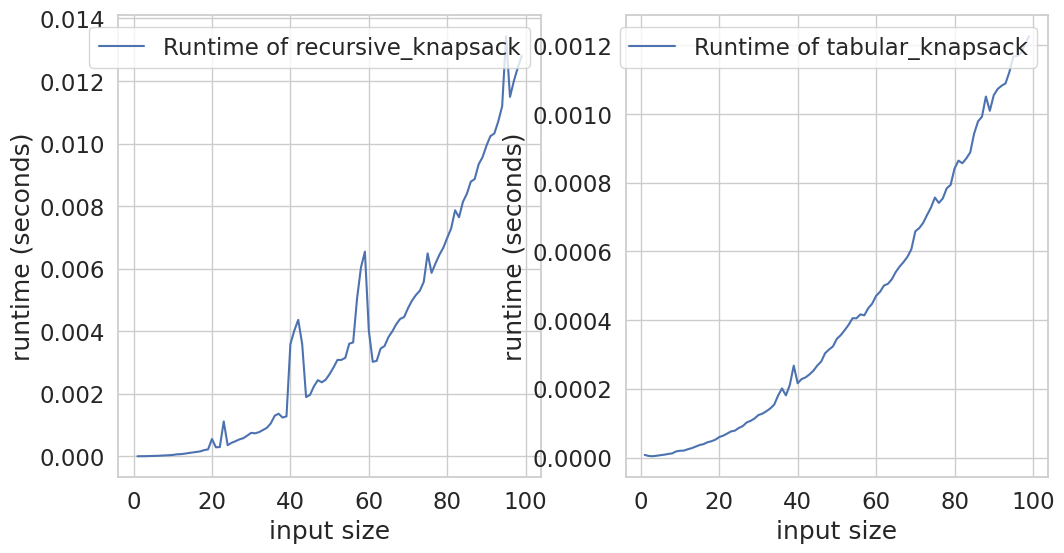

In [147]:
def time_func(f,arg):
    start_time = time.time()
    f(*arg)
    end_time = time.time()
    return end_time-start_time
input_sizes = range(1,100)
objects_tuples = [ tuple((i, i) for i in range(input_size)) for input_size in input_sizes ]  # Convert generator to tuple
weight_capacities = [int(1.2*input_size) for input_size in input_sizes]
args_list= list(zip(objects_tuples,weight_capacities))
#print(args_list[0])
time_functions(time_func,recursive_knapsack, tabular_knapsack, args_list,input_sizes)


There are at most $O(nW)$ nodes in this DAG, and the longest path is $O(n)$. Each node requires $O(1)$ work/span, so the work is $O(nW)$ and the span is $O(n)$. Is this efficient?

Well, not really. We need exponential time in the input size of $W$. We get only $\log_2(W)$ bits as input, but take time proportional to $W$. 

This isn't completely satisfying, but if it makes you feel better we do not know of any efficient algorithm for the 0-1 Knapsack problem (more on this at the end of the semester). Also, the algorithm is efficient if we consider $W$ to be fixed.

### Elements of Dynamic Programming

This is what we call **dynamic programming**. The elements of a dynamic programming algorithm are:

- Optimal Substructure
- Recursion DAG



The correctness of the dynamic programming approach follows from the optimal substructure property (i.e., induction). If we can prove that the optimal substructure property holds, and that we compute a solution by correctly implementing this property then our solution is optimal.



As with divide and conquer algorithms, achieving a good work/span can be tricky. We can minimize redundant computation by memoizing solutions to all subproblems, which we can do: 

- *top-down* by saving the result of a recursive call the first time we encounter it. 

- *bottom-up* by filling in a table using the recurrence as a guide.



Can we derive the number of nodes in the DAG using the optimal substructure property?


### Work and Span in Dynamic Programming

Since we memoize the solution to every distinct subproblem, the number of nodes in the DAG is equal to the number of distinct subproblems considered, that is, the number of cells in the table.. 

There are at most $O(nW)$ nodes in the table, and the longest path in the DAG is $O(n)$. 

The longest path in the DAG represents the span of our dynamic programming algorithm.

Each node requires $O(1)$ work/span, so the work is $O(nW)$ and the span is $O(n)$.

### Why "Dynamic Programming"?

The mathematician Richard Bellman coined the term ["dynamic programming"](https://en.wikipedia.org/wiki/Dynamic_programming) to describe the recursive approach we just showed. The optimal substructure property is sometimes referred to as a "Bellman equation." But why did he call it dynamic programming?

There is some [folklore](https://en.wikipedia.org/wiki/Dynamic_programming#History) around the exact reason. But it could possibly be because "dynamic" is a really dramatic way to describe the search weaving through the DAG. The term "programming" was used in the field of optimization in the 1950s to describe an optimization approach (e.g., linear programming, quadratic programming, mathematical programming). 

